In [1]:
import math
import meep as mp
from meep import mpb

num_bands = 8
resolution = 32
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1),
                              basis1=mp.Vector3(math.sqrt(3)/2, 0.5),
                              basis2=mp.Vector3(math.sqrt(3)/2, -0.5))
geometry = [mp.Cylinder(0.2, material=mp.Medium(epsilon=12))]
k_points = [
    mp.Vector3(),               # Gamma
    mp.Vector3(y=0.5),          # M
    mp.Vector3(-1./3, 1./3),    # K
    mp.Vector3(),               # Gamma
]
k_points = mp.interpolate(4, k_points)

ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    resolution=resolution,
    num_bands=num_bands
)
ms.run_tm(mpb.output_at_kpoint(mp.Vector3(-1./3, 1./3), mpb.fix_efield_phase))
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list
ms.run_te()
te_freqs = ms.all_freqs
te_gaps = ms.gap_list

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (0.866025, -0.5, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.57735, -1, 0)
     (-0, 0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.1, 0.0>
  Vector3<0.0, 0.2, 0.0>
  Vector3<0.0, 0.30000000000000004, 0.0>
  Vector3<0.0, 0.4, 0.0>
  Vector3<0.0, 0.5, 0.0>
  Vector3<-0.06666666666666667, 0.4666666666666667, 0.0>
  Vector3<-0.13333333333333333, 0.43333333333333335, 0.0>
  Vect

/home/mark/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/mark/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/mark/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/mark/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


    iteration    5: trace = 4.598538556346595 (1.04583% change)
    linmin: converged after 4 iterations.
    iteration    6: trace = 4.583675694184926 (0.323732% change)
    linmin: converged after 4 iterations.
    iteration    7: trace = 4.579642258231386 (0.0880344% change)
    linmin: converged after 4 iterations.
    iteration    8: trace = 4.578563492172862 (0.0235585% change)
    linmin: converged after 4 iterations.
    iteration    9: trace = 4.578167233886537 (0.00865502% change)
    linmin: converged after 4 iterations.
    iteration   10: trace = 4.57797141500577 (0.00427732% change)
    linmin: converged after 2 iterations.
    iteration   11: trace = 4.577916076961869 (0.0012088% change)
    linmin: converged after 2 iterations.
    iteration   12: trace = 4.577901548218997 (0.000317366% change)
    linmin: converged after 2 iterations.
    iteration   13: trace = 4.577896525823948 (0.00010971% change)
    linmin: converged after 2 iterations.
    iteration   14: trace =

In [2]:
md = mpb.MPBData(rectify=True, periods=3, resolution=32)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)

epsilon: 1-12, mean 2.59614, harm. mean 1.17149, 17.2852% > 1, 14.5104% "fill"
real part range: 1 .. 12


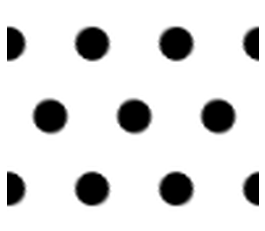

In [3]:
import matplotlib.pyplot as plt
plt.imshow(converted_eps.T, interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

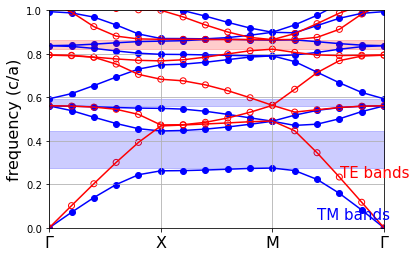

In [4]:
import matplotlib.pyplot as plt
import numpy as np 

fig, ax = plt.subplots()
x = range(len(tm_freqs))
# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
for xz, tmz, tez in zip(x, tm_freqs, te_freqs):
    ax.scatter([xz]*len(tmz), tmz, color='blue')
    ax.scatter([xz]*len(tez), tez, color='red', facecolors='none')
ax.plot(tm_freqs, color='blue')
ax.plot(te_freqs, color='red')
ax.set_ylim([0, 1])
ax.set_xlim([x[0], x[-1]])

# Plot gaps
for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

for gap in te_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(12, 0.04, 'TM bands', color='blue', size=15)
ax.text(13.05, 0.235, 'TE bands', color='red', size=15)

points_in_between = (len(tm_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'X', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)

plt.show()

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (0.866025, -0.5, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.57735, -1, 0)
     (-0, 0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Solving for band polarization: tm.
Initializing fields to random numbers...
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.1, 0.0>
  Vector3<0.0, 0.2, 0.0>
  Vector3<0.0, 0.30000000000000004, 0.0>
  Vector3<0.0, 0.4, 0.0>
  Vector3<0.0, 0.5, 0.0>
  Vector3<-0.06666666666666667, 0.4666666666666667, 0.0>
  Vector3<-0.13333333333333333, 0.43333333333333335, 0.0>
  Vector3<-0.2, 0.399999999

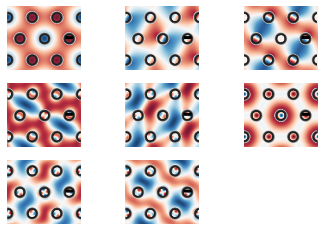

In [5]:
efields = []

def get_efields(ms, band):
    efields.append(ms.get_efield(band, bloch_phase=True))

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(1 / -3, 1 / 3), mpb.fix_efield_phase,
          get_efields))

# Create an MPBData instance to transform the efields
md = mpb.MPBData(rectify=True, resolution=32, periods=3)

converted = []
for f in efields:
    # Get just the z component of the efields
    f = f[..., 0, 2]
    converted.append(md.convert(f))

for i, f in enumerate(converted):
    plt.subplot(331 + i)
    plt.contour(converted_eps.T, cmap='binary')
    plt.imshow(np.real(f).T, interpolation='spline36', cmap='RdBu', alpha=0.9)
    plt.axis('off')

plt.show()

In [6]:
import math
import meep as mp
from meep import mpb

# Dielectric spheres in a diamond (fcc) lattice.  This file is used in
# the "Data Analysis Tutorial" section of the MPB manual.

sqrt_half = math.sqrt(0.5)
geometry_lattice = mp.Lattice(
    basis_size=mp.Vector3(sqrt_half, sqrt_half, sqrt_half),
    basis1=mp.Vector3(0, 1, 1),
    basis2=mp.Vector3(1, 0, 1),
    basis3=mp.Vector3(1, 1)
)

# Corners of the irreducible Brillouin zone for the fcc lattice,
# in a canonical order:
vlist = [
    mp.Vector3(0, 0.5, 0.5),        # X
    mp.Vector3(0, 0.625, 0.375),    # U
    mp.Vector3(0, 0.5, 0),          # L
    mp.Vector3(0, 0, 0),            # Gamma
    mp.Vector3(0, 0.5, 0.5),        # X
    mp.Vector3(0.25, 0.75, 0.5),    # W
    mp.Vector3(0.375, 0.75, 0.375)  # K
]

k_points = mp.interpolate(4, vlist)

# define a couple of parameters (which we can set from the command_line)
eps = 11.56  # the dielectric constant of the spheres
r = 0.25  # the radius of the spheres

diel = mp.Medium(epsilon=eps)

# A diamond lattice has two "atoms" per unit cell:
geometry = [mp.Sphere(r, center=mp.Vector3(0.125, 0.125, 0.125), material=diel),
            mp.Sphere(r, center=mp.Vector3(-0.125, -0.125, -0.125), material=diel)]

# A simple fcc lattice would have only one sphere/object at the origin.

resolution = 16  # use a 16x16x16 grid
mesh_size = 5
num_bands = 5

ms = mpb.ModeSolver(
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    geometry=geometry,
    resolution=resolution,
    num_bands=num_bands,
    mesh_size=mesh_size
)


# run calculation, outputting electric_field energy density at the U point:
ms.run(mpb.output_at_kpoint(mp.Vector3(0, 0.625, 0.375), mpb.output_dpwr))

Initializing eigensolver data
Computing 5 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 16 x 16 x 16.
Solving for 5 bands at a time.
Creating Maxwell data...
Mesh size is 5.
Lattice vectors:
     (0, 0.5, 0.5)
     (0.5, 0, 0.5)
     (0.5, 0.5, 0)
Cell volume = 0.25
Reciprocal lattice vectors (/ 2 pi):
     (-1, 1, 1)
     (1, -1, 1)
     (1, 1, -1)
Geometric objects:
     sphere, center = (0.125,0.125,0.125)
          radius 0.25
     sphere, center = (-0.125,-0.125,-0.125)
          radius 0.25
Geometric object tree has depth 4 and 35 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
31 k-points
  Vector3<0.0, 0.5, 0.5>
  Vector3<0.0, 0.525, 0.475>
  Vector3<0.0, 0.55, 0.45>
  Vector3<0.0, 0.575, 0.425>
  Vector3<0.0, 0.6, 0.4>
  Vector3<0.0, 0.625, 0.375>
  Vector3<0.0, 0.6, 0.3>
  Vector3<0.0, 0.575, 0.225>
  Vector3<0.0, 0.55, 0.15000000000000002>
  

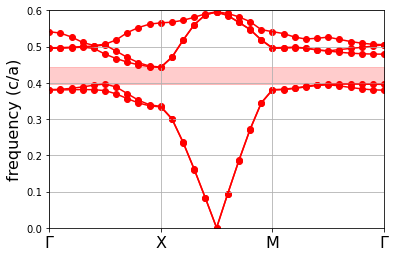

In [13]:
import matplotlib.pyplot as plt
freqs = ms.all_freqs
gaps = ms.gap_list
fig, ax = plt.subplots()
x = range(len(freqs))
for xz, tz in zip(x, freqs):
    ax.scatter([xz]*len(tz), tz, color='red')
ax.plot(freqs, color='red')
ax.set_ylim([0, 0.6])
ax.set_xlim([x[0], x[-1]])
for gap in gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)
#ax.text(12, 0.04, 'bands', color='red', size=15)
points_in_between = (len(freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'X', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)

plt.show()